In [1]:

#Step 0: Restarting the session and Clearning all temporary variables----------------------------


try:
    from IPython import get_ipython
    get_ipython().magic('clear')
    get_ipython().magic('reset -f')
except:
    pass


In [2]:

# Step 1: Import relevant libraries---------------------------------------------------------


#Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm

# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#sklearn modules for Model Selection:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # Required to enable HGBR
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.impute import SimpleImputer

#sklearn modules for Model Evaluation & Improvement:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

#Standard libraries for data visualization:
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.colors as mcolors
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve

#Miscellaneous Utilitiy Libraries:    
import random
import os
import re
import sys
import timeit
import string
import time
import warnings
from datetime import datetime
from time import time
from operator import attrgetter
from dateutil.parser import parse
import joblib

In [3]:
#Step 2: Set up current working directory------------------------------------------

#os.chdir(r”C:/Users/srees/Propensity Scoring Models/Predict Customer lifetime value/”)


In [4]:

# Step 3: Import the dataset--------------------------------------------------------

dataset = pd.read_excel('online_retail_monthly.xlsx',
                   dtype={'customer_id': str,
                          'transaction_id': str},
                   parse_dates=['transaction_date'])





In [5]:
df = dataset

In [6]:
# Step 4: Evaluate Datastructure --------------------------------------------------------

df.head()

,transaction_id,transaction_item_code,transaction_item_description,product_type,frequency_of_payment,quantity,transaction_date,price,customer_id,country,transaction_amount,first_transaction_month
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,fast_moving_consumer_goods,monthly,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,2009-12-01
1,489434,79323P,PINK CHERRY LIGHTS,fast_moving_consumer_goods,monthly,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01
2,489434,79323W,WHITE CHERRY LIGHTS,fast_moving_consumer_goods,monthly,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,2009-12-01
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",fast_moving_consumer_goods,monthly,48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,2009-12-01
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,fast_moving_consumer_goods,monthly,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,2009-12-01


In [7]:

df.columns


Index(['transaction_id', 'transaction_item_code',
       'transaction_item_description', 'product_type', 'frequency_of_payment',
       'quantity', 'transaction_date', 'price', 'customer_id', 'country',
       'transaction_amount', 'first_transaction_month'],
      dtype='object')

In [8]:
df.describe()


,quantity,price,transaction_amount
count,525461.000000,525461.000000,525461.000000
mean,10.337667,4.688834,18.154506
std,107.424110,146.126914,160.333083
min,-9600.000000,-53594.360000,-53594.360000
25%,1.000000,1.250000,3.750000
50%,3.000000,2.100000,9.950000
75%,10.000000,4.210000,17.700000
max,19152.000000,25111.090000,25111.090000


In [9]:
df.dtypes

transaction_id                          object
transaction_item_code                   object
transaction_item_description            object
product_type                            object
frequency_of_payment                    object
quantity                                 int64
transaction_date                datetime64[ns]
price                                  float64
customer_id                             object
country                                 object
transaction_amount                     float64
first_transaction_month                 object
dtype: object

In [10]:
#Recheck Column Datatypes and Missing Values:
    
df.columns.to_series().groupby(df.dtypes).groups


{int64: ['quantity'], datetime64[ns]: ['transaction_date'], float64: ['price', 'transaction_amount'], object: ['transaction_id', 'transaction_item_code', 'transaction_item_description', 'product_type', 'frequency_of_payment', 'customer_id', 'country', 'first_transaction_month']}

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   transaction_id                525461 non-null  object        
 1   transaction_item_code         525461 non-null  object        
 2   transaction_item_description  522533 non-null  object        
 3   product_type                  525461 non-null  object        
 4   frequency_of_payment          525461 non-null  object        
 5   quantity                      525461 non-null  int64         
 6   transaction_date              525461 non-null  datetime64[ns]
 7   price                         525461 non-null  float64       
 8   customer_id                   417534 non-null  object        
 9   country                       525461 non-null  object        
 10  transaction_amount            525461 non-null  float64       
 11  first_transac

In [12]:
df.isna().any()

transaction_id                  False
transaction_item_code           False
transaction_item_description     True
product_type                    False
frequency_of_payment            False
quantity                        False
transaction_date                False
price                           False
customer_id                      True
country                         False
transaction_amount              False
first_transaction_month          True
dtype: bool

In [13]:
df.isna().sum()

transaction_id                       0
transaction_item_code                0
transaction_item_description      2928
product_type                         0
frequency_of_payment                 0
quantity                             0
transaction_date                     0
price                                0
customer_id                     107927
country                              0
transaction_amount                   0
first_transaction_month         107927
dtype: int64

In [14]:
#Identify Unique values in each categorical variable:

df["frequency_of_payment"].nunique()

df["frequency_of_payment"].unique()


df["product_type"].nunique()

df["product_type"].unique()


df["country"].nunique()

df["country"].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Nigeria',
       'Netherlands', 'Poland', 'Spain', 'Channel Islands', 'Italy',
       'Cyprus', 'Greece', 'Norway', 'Austria', 'Sweden',
       'United Arab Emirates', 'Finland', 'Switzerland', 'Unspecified',
       'Malta', 'Bahrain', 'RSA', 'Bermuda', 'Hong Kong', 'Singapore',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Lebanon',
       'Korea', 'Brazil', 'Canada', 'Iceland'], dtype=object)

In [15]:
 #Step 5: Clean Dataset--------------------------------------------------------
df = df.dropna(subset=["transaction_id", "customer_id", "transaction_date", "first_transaction_month"])

# Replace NA's in "transaction_amount" with 0
df["transaction_amount"].fillna(0, inplace=True)

# Filter data & select only monthly FMCG transactions in UK
df = df[(df["frequency_of_payment"] == "monthly") & 
        (df["product_type"] == "fast_moving_consumer_goods") & 
        (df["country"] == "United Kingdom")]

#Filter out all the returns
df = df.query('quantity > 0')


/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
# Step 6: Build Cohort Analysis (Retention Rate)

# Convert the 'first_transaction_month' column into a monthly period
df['first_transaction_month'] = pd.to_datetime(df['first_transaction_month'], format='%Y-%m-%d').dt.to_period('M')

# Convert the 'transaction_date' column into a monthly period
df["record_level_transaction_month"] = df["transaction_date"].dt.to_period('M')

# Rename the 'first_transaction_month' column as 'cohort'
df.rename(columns={'first_transaction_month': 'cohort'}, inplace=True)

# Calculate the number of unique customers per cohort and 'record level transaction month'
df_cohort_1 = (df
    .groupby(["cohort", "record_level_transaction_month"])
    .agg(no_of_customers=("customer_id", "count"))
    .reset_index()
)

# Compute the difference in months/periods between 'cohort' and 'record_level_transaction_month'
df_cohort_1['period_number'] = df_cohort_1.apply(lambda row: (row['record_level_transaction_month'] - row['cohort']).n, axis=1)

# Calculate the total number of customers in the cohort and the retention rate for each period
mask1 = df_cohort_1['period_number'] == 0
interim_tbl = df_cohort_1.loc[mask1, ['cohort', 'no_of_customers']].rename(columns={'no_of_customers': 'total_customers'})
df_cohort_1 = df_cohort_1.merge(interim_tbl, on='cohort', how='left')
df_cohort_1['retention_rate_%'] = (100 * df_cohort_1['no_of_customers'] / df_cohort_1['total_customers']).round(2)

# Calculate the churn rate as the complement of the retention rate, and handle zero churn rates
df_cohort_1["churn_rate_%"] = (100 - df_cohort_1["retention_rate_%"]).round(2)
df_cohort_1.loc[df_cohort_1["churn_rate_%"] == 0.00, "churn_rate_%"] = 100


In [17]:
#Step 6.5. Active and Lost Customers:
    
# Assign the number of active customers in each passing year of a cohort to the "active_cust" column
df_cohort_1 = df_cohort_1.assign(active_cust=df_cohort_1["no_of_customers"])

# Compute the lost customers for each cohort and period by taking the difference between the current and previous period's "active_cust" values
lost_customers = (
    df_cohort_1
    .groupby(['cohort', 'record_level_transaction_month', 'period_number'])['active_cust']
    .sum()
    .groupby(level=0)
    .diff()
    .abs()
    .reset_index(name='lost_cust')
)

# Merge the "lost_customers" data back into the original "df_cohort_1" DataFrame
df_cohort_1 = df_cohort_1.merge(lost_customers, on=['cohort', 'record_level_transaction_month', 'period_number'], how='left')

# Replace any missing "lost_cust" values with the corresponding "active_cust" values
df_cohort_1['lost_cust'].fillna(df_cohort_1['active_cust'], inplace=True)

#Rearrange the column positions:

select = ['cohort', 'record_level_transaction_month', 'period_number', 'no_of_customers', 'retention_rate_%', 'churn_rate_%', 'active_cust', 'lost_cust']
df_cohort_1 = df_cohort_1.loc[:, select]


In [18]:
#Step 7: Build Cohort Analysis (Cumulative Revenue)-------------------------------------------------------

# Aggregate revenue data by cohort and record level transaction month

  
df_cohort_2 = (
    df.groupby(["cohort", "record_level_transaction_month"])
    ["transaction_amount"]
    .sum()
    .reset_index(name="revenue")
)

# Calculate the time difference in months between cohort and transaction month
         
df_cohort_2['period_number'] = (df_cohort_2.record_level_transaction_month - df_cohort_2.cohort).apply(attrgetter('n'))

# Compute cumulative revenue for each cohort and period

cumulative_revenue = (df_cohort_2
                     .groupby(['cohort', 'record_level_transaction_month', 'period_number'])['revenue']
                     .sum()
                     .groupby(level=0)
                     .cumsum()
                     .rename('cumulative_revenue')
                     .reset_index())

# Merge cumulative revenue data into the original cohort analysis
df_cohort_2 = df_cohort_2.merge(cumulative_revenue, on=['cohort', 'record_level_transaction_month', 'period_number'], how='left')

# Rearrange columns for readability
df_cohort_2 = df_cohort_2[['cohort', 'record_level_transaction_month', 'period_number', 'revenue', 'cumulative_revenue']]


In [19]:
#Build ARPU & Traditional Avg. LifeTime Value------------Part 1--------------------

# Merge two cohort dataframes on specific columns
df_cohort_final = pd.merge(df_cohort_1, df_cohort_2, on=['cohort', 'record_level_transaction_month', 'period_number'], how='left')

# Calculate average revenue per user for each cohort and time period
df_cohort_final["avg_revenue_per_user"] = df_cohort_final["cumulative_revenue"] / df_cohort_final["no_of_customers"]

# Round the average revenue per user to 2 decimal places
df_cohort_final["avg_revenue_per_user"] = df_cohort_final["avg_revenue_per_user"].round(2)


In [20]:
#Build ARPU & Traditional Avg. LifeTime Value------------Part 2--------------------

# Create a copy of the original dataset to avoid modifying it directly
dataset_1 = dataset.copy()

# Remove transactions with missing transaction dates
dataset_1 = dataset_1[pd.notnull(dataset_1["transaction_date"])]

# Convert transaction_date column to datetime data type
dataset_1['transaction_date'] = dataset_1['transaction_date'].astype('datetime64')

# Group transactions by customer ID and get the first transaction date for each customer
first_transaction_date = dataset_1.groupby('customer_id')['transaction_date'].agg('min')

# Merge the first_transaction_date column into the original dataset
dataset_1 = dataset_1.merge(first_transaction_date, how='left', on='customer_id', suffixes=('', '_first'))

# Rename the new column to first_transaction_date
dataset_1.rename(columns={'transaction_date_first': 'first_transaction_date'}, inplace=True)

# Remove rows with missing first_transaction_date values
dataset_1.dropna(subset=['first_transaction_date'], inplace=True)

#Convert date columns to datetime format and then back to string format
date_cols = ["transaction_date", "first_transaction_date"]
dataset_1[date_cols] = dataset_1[date_cols].apply(pd.to_datetime, format='%Y-%m-%d').astype(str)

# Converts the "transaction_date" and "first_transaction_date" columns in "dataset_1" from strings to datetime objects 
#using the "apply()" method and assigns the results back to the same columns.
dataset_1[["transaction_date", "first_transaction_date"]] = dataset_1[["transaction_date", "first_transaction_date"]].apply(pd.to_datetime)


# Adds two new columns to dataset_1 with the year of each transaction.
dataset_1 = dataset_1.assign(first_transaction_yr=dataset_1['first_transaction_date'].dt.to_period('Y'),
                             record_level_transaction_yr=dataset_1['transaction_date'].dt.to_period('Y'))

# Convert date columns into year-month period format and assign to new columns
dataset_1[['first_transaction_yr_month', 'record_level_transaction_yr_month']] = dataset_1[['first_transaction_date', 'transaction_date']].apply(lambda x: x.dt.to_period('M'))


dataset_1.rename(columns={'first_transaction_yr_month':'cohort'}, inplace = True)

# Calculate the number of periods between transaction date and cohort date
dataset_1['period_number'] = (dataset_1.record_level_transaction_yr_month - dataset_1.cohort).apply(attrgetter('n'))


dataset_1.query("cohort >= '2009-12'", inplace=True)

# Filter dataset_1 to include only records from past cohorts and exclude current month
today_str = datetime.today().strftime('%Y-%m')
dataset_1 = dataset_1[(dataset_1["cohort"] < today_str) & (dataset_1["record_level_transaction_yr_month"] != today_str)]




In [21]:
#Build ARPU & Traditional Avg. LifeTime Value------------Part 3--------------------

df_cohort_final.rename(columns={'record_level_transaction_month':'record_level_transaction_yr_month'}, inplace = True)

# Defining the column names for grouping the dataset
column_names  = ['cohort','record_level_transaction_yr_month' ,'period_number' ]

# Grouping the dataset by specified column names
sector = dataset_1.groupby (column_names)

# Aggregating transaction_id and customer_id columns by counting unique values
df_cohort_3 = sector.agg({"transaction_id" : "nunique", 
             "customer_id" : "nunique"})

# Calculating the number of purchases per customer
df_cohort_3["no_of_cust_purchases"] =  df_cohort_3["transaction_id"] / df_cohort_3["customer_id"]

df_cohort_3["no_of_cust_purchases"]  = round(df_cohort_3["no_of_cust_purchases"], 1)

# Merging df_cohort_final with df_cohort_3 on specified columns
df_cohort_final = pd.merge(df_cohort_final,df_cohort_3, on=['cohort','record_level_transaction_yr_month' ,'period_number'], how='left') 

df_cohort_final = df_cohort_final.rename(columns={'transaction_id':'total_transactions', 'customer_id':'total_customers'})

# Adding a new column period_number_for_cltv which is period_number + 1
df_cohort_final["period_number_for_cltv"] = df_cohort_final["period_number"] +1

# Calculating the retention rate for each cohort by grouping and shifting the retention_rate_% column
df_cohort_final["retention_rate_for_cltv"] = df_cohort_final.groupby(["cohort"])["retention_rate_%"].shift(-1)



In [22]:
#Build ARPU & Traditional Avg. LifeTime Value------------Part 4--------------------

column_names  = ['cohort']

# Group the dataframe 'df_cohort_final' by the column 'cohort'
sector = df_cohort_final.groupby (column_names)

# Compute the mean of the 'retention_rate_for_cltv' column for each group 
interim_tbl2 = sector.agg({"retention_rate_for_cltv" : "mean"})

interim_tbl2.rename(columns={'retention_rate_for_cltv':'retention_rate_cohort_avg'}, inplace = True)

# Merge the 'interim_tbl2' dataframe with 'df_cohort_final' on the 'cohort' column
df_cohort_final = pd.merge(df_cohort_final,interim_tbl2, on=['cohort'], how='left')

df_cohort_final["retention_rate_cohort_avg"] = pd.to_numeric(df_cohort_final["retention_rate_cohort_avg"], errors="coerce").round(1)

df_cohort_final["retention_rate_for_cltv"].fillna(df_cohort_final["retention_rate_cohort_avg"], inplace=True)

# Compute 'avg_profit_margin_per_cohort' column by multiplying different columns of 'df_cohort_final'
df_cohort_final["avg_profit_margin_per_cohort"] = np.multiply(
    np.multiply(df_cohort_final["avg_revenue_per_user"], 0.2),
    np.multiply(df_cohort_final["period_number_for_cltv"], df_cohort_final["no_of_cust_purchases"])
)

# Define a discount rate of 4%
discount_rate = 0.04

# Compute the traditional LTV for each row using 'avg_profit_margin_per_cohort', 'retention_rate_for_cltv' and 'discount_rate'
df_cohort_final["traditional_ltv"] = (
    df_cohort_final["avg_profit_margin_per_cohort"] *
    ((df_cohort_final["retention_rate_for_cltv"] / 100) /
     ((1 + discount_rate) - (df_cohort_final["retention_rate_for_cltv"] / 100)))
)

# Convert the 'traditional_ltv' column to numeric data type and round off to 1 decimal place
df_cohort_final["traditional_ltv"] = pd.to_numeric(df_cohort_final["traditional_ltv"], errors="coerce").round(1)



In [23]:
#Build ARPU & Traditional Avg. LifeTime Value------------Part 5--------------------

column_names  = ['cohort','record_level_transaction_yr_month' ,'period_number' ,'customer_id','product_type', 'transaction_item_code', 
       'transaction_item_description']

sectors = dataset_1.groupby (column_names)

# Aggregate grouped data based on specified metrics
cust_profile_output = sectors.agg({"transaction_id" : "nunique", 
             "quantity" : "sum",
             "transaction_amount": "sum"})

cust_profile_output .reset_index(inplace = True)

# Merge the output data with another dataframe based on specified columns
output_data= cust_profile_output.merge(df_cohort_final,  on = ['cohort', 'record_level_transaction_yr_month', 'period_number'],how = "left",)

# Calculate the rank of each row within each group based on specified columns
output_data['RN'] = output_data.sort_values(['cohort','record_level_transaction_yr_month','period_number'], ascending=True) \
             .groupby(['cohort','record_level_transaction_yr_month','period_number']) \
             .cumcount() + 1

output_data.rename(columns={'retention_rate_%':'retention_rate', 'churn_rate_%':'churn_rate' }, inplace = True)

# Fill missing values in a specific column with another column's values where RN is 1
output_data.loc[output_data["RN"] == 1, "total_acquired_customers"] = output_data["total_customers"]
output_data["total_acquired_customers"].fillna(0, inplace=True)

output_data.loc[output_data["RN"] == 1, "total_customers"] = output_data["no_of_customers"]
output_data["total_customers"].fillna(0, inplace=True)

output_data.loc[output_data["RN"] == 1, "total_transactions"] = output_data["total_transactions"]
output_data["total_transactions"].fillna(0, inplace=True)

# Replace values in specific columns with 0 where RN is not 1
mask = output_data["RN"] == 1
output_data.loc[~mask, ["no_of_cust_purchases", "retention_rate", "retention_rate_for_cltv", "retention_rate_cohort_avg"]] = 0

mask = output_data["RN"] == 1
output_data.loc[~mask, ["churn_rate", "active_cust", "lost_cust", "revenue", "cumulative_revenue", "avg_revenue_per_user", "avg_profit_margin_per_cohort", "traditional_ltv"]] = 0



In [24]:
#Customers behind these cohorts--------------------------------------------------------

cohort_customers = output_data.groupby(['cohort', 'record_level_transaction_yr_month', 'period_number', 'customer_id']) \
                             .agg(cltv_interim=('traditional_ltv', 'min')) \
                             .reset_index()

cohort_customers = pd.merge(cohort_customers, df_cohort_final, on = ['cohort', 'record_level_transaction_yr_month', 'period_number'], how='left')


cohort_customers["ltv_flag"] = pd.Series(np.where(cohort_customers["traditional_ltv"].notna() ==True,1, 0))

cohort_customers = cohort_customers[cohort_customers["ltv_flag"] == 1]




In [25]:
#Customer Segments by CLTV --------------------------------------------------------

customers_ltv = cohort_customers.groupby(['customer_id'])['cohort','period_number', 'traditional_ltv'].max().reset_index()

# Calculate the 80th percentile of traditional_ltv
traditional_ltv_80p = df_cohort_final.traditional_ltv.quantile(0.8)

# Create a new column with "high_cltv" for customers with traditional_ltv >= 80th percentile, and "unknown" for others
customers_ltv["traditional_ltv_segments"] = np.where(customers_ltv["traditional_ltv"] >= traditional_ltv_80p, "high_cltv", "unknown")

# Calculate the 50th and 80th percentile of traditional_ltv
q_low, q_high = customers_ltv["traditional_ltv"].quantile([0.5, 0.8])

# Create a boolean mask for traditional_ltv values between the 50th and 80th percentile
mask = (q_low <= customers_ltv["traditional_ltv"]) & (customers_ltv["traditional_ltv"] < q_high)

# Replace values in the "traditional_ltv_segments" column that meet the mask criteria with "medium_cltv"
customers_ltv["traditional_ltv_segments"] = customers_ltv["traditional_ltv_segments"].mask(mask, "medium_cltv")


# Calculate the median of traditional_ltv from df_cohort_final
traditional_ltv_median = df_cohort_final.traditional_ltv.quantile(0.5)

# Create a boolean mask to identify traditional_ltv values less than the median
traditional_ltv_mask = customers_ltv["traditional_ltv"] < traditional_ltv_median

# Assign "low_cltv" to the traditional_ltv_segments column where the mask is True
customers_ltv.loc[traditional_ltv_mask, "traditional_ltv_segments"] = "low_cltv"


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
#Final selection:


df_cohort_final.rename(columns={'retention_rate_%':'retention_rate_pc', 'churn_rate_%':'churn_rate_pc' }, inplace = True)

df_cohort_final["cohort"] = df_cohort_final["cohort"].astype('str', copy=False)

df_cohort_final = df_cohort_final.astype({'record_level_transaction_yr_month': 'str'})


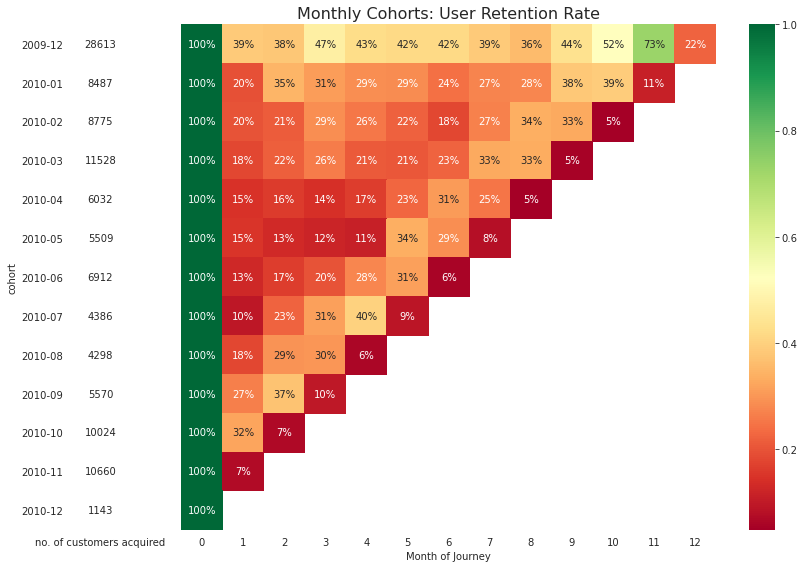

In [28]:


#Step 10.1: Pivot the data to showcase retention rate:----------------------------------

#type1: Create a pivot table to show retention rates by cohort and period number.
cohort_pivot_1 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'retention_rate_pc')

#type2: Create a pivot table to show retention rates by period number and cohort.
cohort_pivot_2 = df_cohort_final.pivot_table(index = 'period_number',
                                     columns = 'cohort',
                                     values = 'retention_rate_pc')


#type3: Add a new column to the DataFrame to show retention rates as absolute values. 
df_cohort_final["retention_rate_abs_val"] = df_cohort_final["retention_rate_pc"] /100

cohort_pivot_3 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'retention_rate_abs_val')

cohort_size_values = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'no_of_customers')

cohort_size = cohort_size_values.iloc[:,0]

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Show retention rates by cohort and period number as a heatmap.
    sns.heatmap(cohort_pivot_3, 
                mask=cohort_pivot_3.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention Rate', fontsize=16)
    ax[1].set(xlabel='Month of Journey',
              ylabel='')

    # Show cohort sizes by cohort and period number as a heatmap.
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'no. of customers acquired'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(   cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()
    

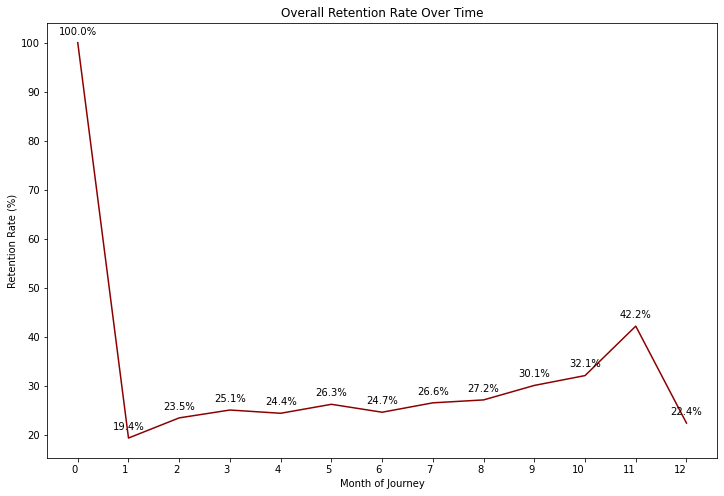

In [31]:

# Compute the average retention rate for each period number
avg_retention_rates = df_cohort_final.groupby('period_number')['retention_rate_pc'].mean().reset_index()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the line chart using seaborn
sns.lineplot(x="period_number", y="retention_rate_pc", data=avg_retention_rates, ax=ax, color='darkred', ci = None)
#plt.fill_between(x="period_number", y1="retention_rate_pc", data=avg_retention_rates, alpha=0.3, color='darkgreen')

# Add annotations to the line chart
for x, y in zip(avg_retention_rates['period_number'], avg_retention_rates['retention_rate_pc']):
    ax.text(x=x, y=y+1.3, s=f"{y:.1f}%", ha='center', va='bottom', color='black')

# Set the title and axis labels
ax.set_title("Overall Retention Rate Over Time")
ax.set_xlabel("Month of Journey")
ax.set_ylabel("Retention Rate (%)")

# Set the x-axis tick locations and labels
ax.set_xticks(avg_retention_rates['period_number'])
ax.set_xticklabels(avg_retention_rates['period_number'], rotation=0, ha='right')

# Display the plot
plt.show()

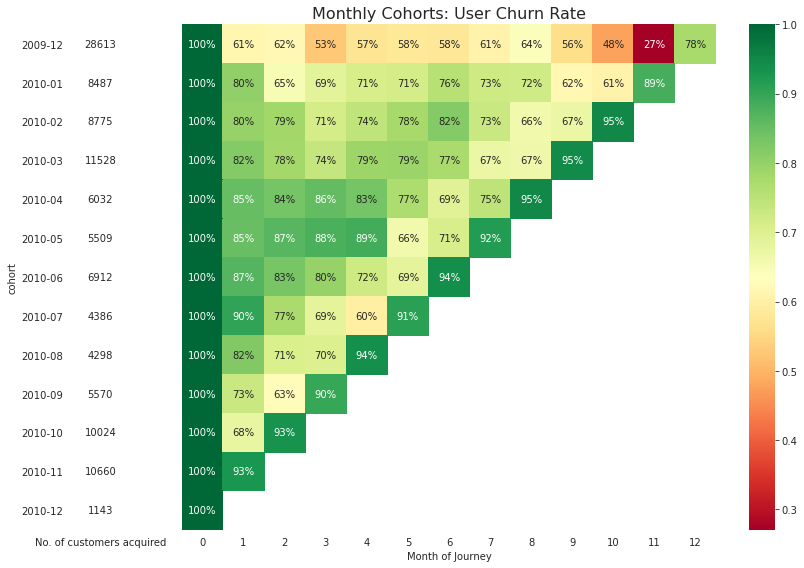

In [32]:

#Step 10.2:Pivot the data to showcase churn rate:----------------------------------

#type1: Create a pivot table to display churn rates by cohort and period number.
cohort_pivot_1 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'churn_rate_pc')

#type2: Create a pivot table to display churn rates by period number and cohort.
cohort_pivot_2 = df_cohort_final.pivot_table(index = 'period_number',
                                     columns = 'cohort',
                                     values = 'churn_rate_pc')

#type3: Convert churn rate percentages to absolute values. 
    
df_cohort_final["churn_rate_abs_val"] = df_cohort_final["churn_rate_pc"] /100

cohort_pivot_3 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'churn_rate_abs_val')

cohort_size_values = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'no_of_customers')

cohort_size = cohort_size_values.iloc[:,0]

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
      # Show churn rates by cohort and period number as a heatmap.
    sns.heatmap(cohort_pivot_3, 
                mask=cohort_pivot_3.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Churn Rate', fontsize=16)
    ax[1].set(xlabel='Month of Journey',
              ylabel='')

        # Show cohort sizes by cohort and period number as a heatmap.
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'No. of customers acquired'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(   cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()



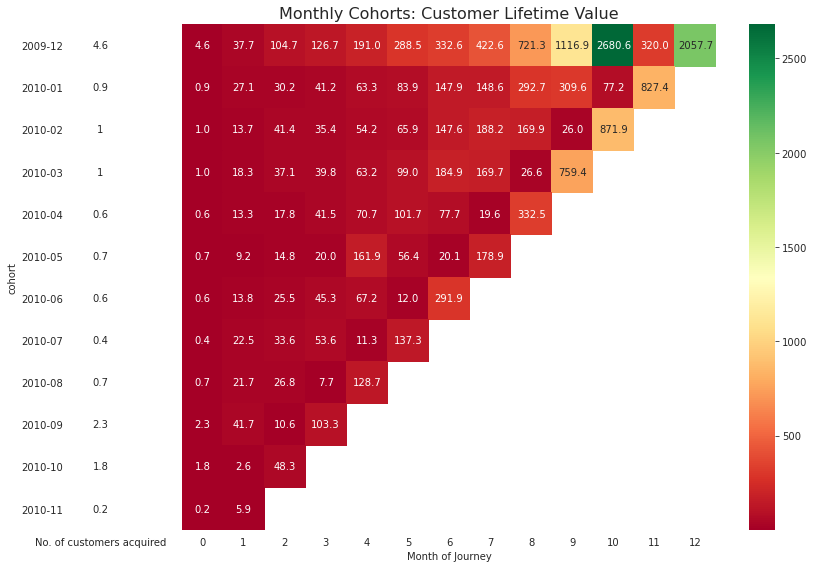

In [33]:

#Step 10.3. Pivot the data to showcase avg_lifetime_value:----------------------------------


#type1: Create a pivot table to display traditional_ltv by cohort and period number.
cohort_pivot_1 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'traditional_ltv')

#type2: Create a pivot table to display traditional_ltv by period number and cohort.
cohort_pivot_2 = df_cohort_final.pivot_table(index = 'period_number',
                                     columns = 'cohort',
                                     values = 'traditional_ltv')


#type3: Convert traditional_ltv percentages to absolute values.
    
cohort_pivot_3 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'traditional_ltv')

cohort_size_values = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'traditional_ltv')

cohort_size = cohort_size_values.iloc[:,0]

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Show churn rates by cohort and period number as a heatmap.
    sns.heatmap(cohort_pivot_3, 
                mask=cohort_pivot_3.isnull(), 
                annot=True, 
                fmt='', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: Customer Lifetime Value', fontsize=16)
    ax[1].set(xlabel='Month of Journey',
              ylabel='')

     # Show cohort sizes by cohort and period number as a heatmap.
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'No. of customers acquired'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(   cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()
    


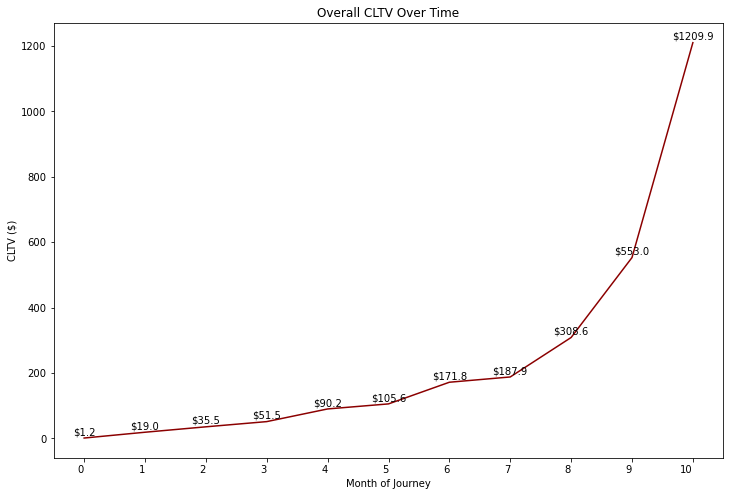

In [35]:
# Compute the average retention rate for each period number
avg_retention_rates = df_cohort_final.groupby('period_number')['traditional_ltv'].mean().reset_index()

# Compute the average retention rate for each period number
avg_retention_rates = avg_retention_rates[avg_retention_rates['period_number'] <= 10]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the line chart using seaborn
sns.lineplot(x="period_number", y="traditional_ltv", data=avg_retention_rates, ax=ax, color='darkred', ci = None)
#plt.fill_between(x="period_number", y1="retention_rate_pc", data=avg_retention_rates, alpha=0.3, color='darkgreen')

# Add annotations to the line chart
for x, y in zip(avg_retention_rates['period_number'], avg_retention_rates['traditional_ltv']):
    ax.text(x=x, y=y+3.5, s=f"${y:.1f}", ha='center', va='bottom', color='black')

# Set the title and axis labels
ax.set_title("Overall CLTV Over Time")
ax.set_xlabel("Month of Journey")
ax.set_ylabel("CLTV ($)")

# Set the x-axis tick locations and labels
ax.set_xticks(avg_retention_rates['period_number'])
ax.set_xticklabels(avg_retention_rates['period_number'], rotation=0, ha='right')

# Display the plot
plt.show()

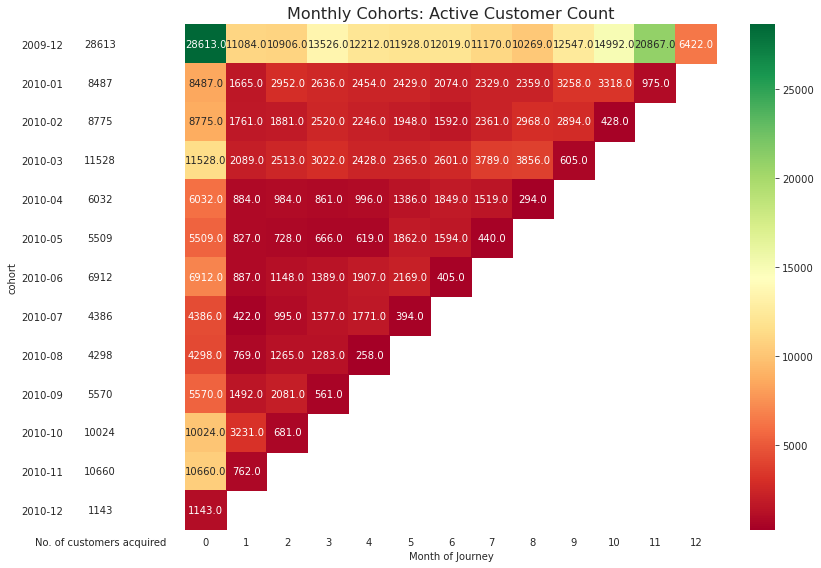

In [36]:
#Step 10.5: Pivot the data to showcase active customers:----------------------------------

#type1:Create a pivot table to display active_cust by cohort and period number.
cohort_pivot_1 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'active_cust')

#type2: Create a pivot table to display active_cust by period number and cohort.
cohort_pivot_2 = df_cohort_final.pivot_table(index = 'period_number',
                                     columns = 'cohort',
                                     values = 'active_cust')

#type3: Convert active_cust percentages to absolute values.
   
cohort_pivot_3 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'active_cust')

cohort_size_values = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'no_of_customers')

cohort_size = cohort_size_values.iloc[:,0]

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Show active_customers by cohort and period number as a heatmap.
    sns.heatmap(cohort_pivot_3, 
                mask=cohort_pivot_3.isnull(), 
                annot=True, 
                fmt='', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: Active Customer Count', fontsize=16)
    ax[1].set(xlabel='Month of Journey',
              ylabel='')

    # Show cohort sizes by cohort and period number as a heatmap.
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'No. of customers acquired'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(   cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()


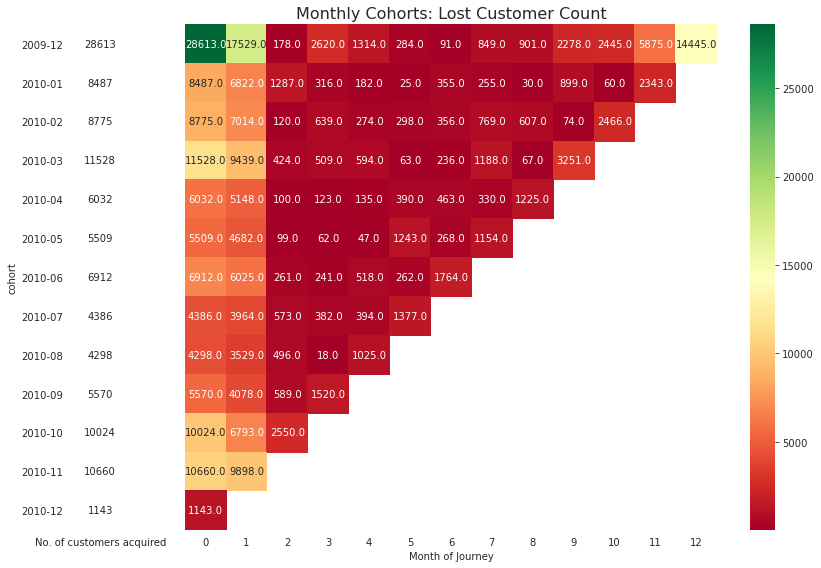

In [37]:

#Step 10.6: Pivot the data to showcase lost customers:----------------------------------

#type1:Create a pivot table to display lost_cust by cohort and period number.
cohort_pivot_1 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'lost_cust')

#type2: Create a pivot table to display lost_cust by period number and cohort.
cohort_pivot_2 = df_cohort_final.pivot_table(index = 'period_number',
                                     columns = 'cohort',
                                     values = 'lost_cust')

#type3: Convert active_cust percentages to absolute values.
   
cohort_pivot_3 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'lost_cust')

cohort_size_values = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'no_of_customers')

cohort_size = cohort_size_values.iloc[:,0]

with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # Show active_customers by cohort and period number as a heatmap.
    sns.heatmap(cohort_pivot_3, 
                mask=cohort_pivot_3.isnull(), 
                annot=True, 
                fmt='', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: Lost Customer Count', fontsize=16)
    ax[1].set(xlabel='Month of Journey',
              ylabel='')

      # Show cohort sizes by cohort and period number as a heatmap.
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'No. of customers acquired'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(   cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [38]:
#Predicting Customer Retention Rate using Multiple Machine Learnt Imputation Methods:----------------------

#Add MoM variance into df_cohort_final - Retention Rate and CLTV
cohort_pivot_3 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'retention_rate_abs_val')

In [67]:
data = cohort_pivot_3.values

In [68]:
# Split the data into features (X) and target (y)
# X contains the row and column indices
# y contains the customer lifetime values
X = np.argwhere(~np.isnan(data))
y = data[~np.isnan(data)]

In [69]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Define the imputation methods
imputation_methods = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bayesian': HistGradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
   
}

In [71]:
# Train each imputation method using the training set and evaluate its performance using R-squared score
r2_scores = {}
for name, method in imputation_methods.items():
    # Fit the imputation method on the training set
    method.fit(X_train, y_train)
    # Predict the missing values in the test set
    y_pred = method.predict(X_test)
    # Evaluate the performance using R-squared score
    r2_scores[name] = r2_score(y_test, y_pred)

In [72]:
# Print the R-squared scores for each imputation method
print("R-squared scores:")
for name, score in r2_scores.items():
    print(f"{name}: {score:.2f}")

R-squared scores:
Random Forest: 0.88
Bayesian: 0.10
KNN: 0.38


In [73]:
# Select the imputation method with the best performance
best_method_name = max(r2_scores, key=r2_scores.get)
best_method = imputation_methods[best_method_name]
print(f"\nBest imputation method: {best_method_name}")


Best imputation method: Random Forest


In [74]:
# Define the hyperparameter search space
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [75]:
# Train a random forest regressor using random search with cross-validation
rf = RandomForestRegressor()
rs = RandomizedSearchCV(rf, param_distributions, n_iter=100, cv=3, scoring='r2', random_state=42)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='r2')

In [76]:
# Print the best hyperparameters
print("Best hyperparameters: ", rs.best_params_)

Best hyperparameters:  {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20}


In [77]:
# Predict the missing values in the original data array using the best imputation method
# Replace the missing values in the original data array with the predicted values
predicted_values = best_method.predict(np.argwhere(np.isnan(data)))
data_predicted = data.copy()
data_predicted[np.isnan(data)] = predicted_values

In [79]:
# Convert the data to a DataFrame and add row and column indices
df = pd.DataFrame(data_predicted,index=[ '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06','2010-07', '2010-08', '2010-09','2010-10', '2010-11', '2010-12'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

#df = pd.DataFrame(data_predicted)

In [ ]:
# Create a heatmap with actual and predicted values distinguished by different colors
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df, cmap='YlGn', annot=False, fmt=".2f",  cbar=False, ax=ax)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = df.iloc[i, j]
        if np.isnan(data[i, j]):
            text_color = 'red'
        else:
            text_color = 'black'
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=text_color)
ax.set_title("Cohort Matrix with Heatmap")
ax.set_xlabel("Month of Customer Journey")
ax.set_ylabel("Month when Customer got Acquired")
plt.show()

In [82]:
#Predict CLTV:----------------------------------------------------------------------------------
cohort_pivot_3 = df_cohort_final.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'traditional_ltv')


In [84]:
data = cohort_pivot_3.values

In [85]:
# Split the data into features (X) and target (y)
# X contains the row and column indices
# y contains the customer lifetime values
X = np.argwhere(~np.isnan(data))
y = data[~np.isnan(data)]

In [86]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
# Define the imputation methods
imputation_methods = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Bayesian': HistGradientBoostingRegressor(random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5)
   
}

In [88]:
# Train each imputation method using the training set and evaluate its performance using R-squared score
r2_scores = {}
for name, method in imputation_methods.items():
    # Fit the imputation method on the training set
    method.fit(X_train, y_train)
    # Predict the missing values in the test set
    y_pred = method.predict(X_test)
    # Evaluate the performance using R-squared score
    r2_scores[name] = r2_score(y_test, y_pred)

In [89]:
# Print the R-squared scores for each imputation method
print("R-squared scores:")
for name, score in r2_scores.items():
    print(f"{name}: {score:.2f}")

R-squared scores:
Random Forest: 0.33
Bayesian: 0.11
KNN: 0.29


In [90]:
# Select the imputation method with the best performance
best_method_name = max(r2_scores, key=r2_scores.get)
best_method = imputation_methods[best_method_name]
print(f"\nBest imputation method: {best_method_name}")


Best imputation method: Random Forest


In [91]:
# Define the hyperparameter search space
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [92]:
# Train a random forest regressor using random search with cross-validation
rf = RandomForestRegressor()
rs = RandomizedSearchCV(rf, param_distributions, n_iter=100, cv=3, scoring='r2', random_state=42)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [10, 20, 30, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='r2')

In [93]:
# Print the best hyperparameters
print("Best hyperparameters: ", rs.best_params_)

Best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 30}


In [94]:
# Predict the missing values in the original data array using the best imputation method
# Replace the missing values in the original data array with the predicted values
predicted_values = best_method.predict(np.argwhere(np.isnan(data)))
data_predicted = data.copy()
data_predicted[np.isnan(data)] = predicted_values

In [96]:
# Convert the data to a DataFrame and add row and column indices
df = pd.DataFrame(data_predicted,index=[ '2009-12', '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06','2010-07', '2010-08', '2010-09','2010-10', '2010-11'], columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'])

#df = pd.DataFrame(data_predicted)

In [ ]:
# Create a heatmap with actual and predicted values distinguished by different colors
sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df, cmap='YlGn', annot=False, fmt=".2f",  cbar=False, ax=ax)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = df.iloc[i, j]
        if np.isnan(data[i, j]):
            text_color = 'red'
        else:
            text_color = 'black'
        ax.text(j + 0.5, i + 0.5, f'{value:.2f}', ha='center', va='center', color=text_color)
ax.set_title("Cohort Matrix with Heatmap")
ax.set_xlabel("Month of Customer Journey")
ax.set_ylabel("Month when Customer got Acquired")
plt.show()